In [ ]:

%%html
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Glassmorphism" />
    <meta
      name="keywords"
      content="glassmorphism, UIUX"
    />
    <meta name="author" content="emmaccen" />
    <title>Glass Morphism</title>
    <style>
      html {
        height: 100%;
      }
      body {
        margin: 0;
        padding: 0;
      }

      * {
        box-sizing: border-box;
      }

      .landingContainer {
        /* span the entire desktop height : height: 100vh;*/
        height: 100%;
        font-family: consolas !important;
        /* set a gradient background with 3 colours https://coolors.co/ */
        background: linear-gradient(
          to right,
          #280b53,
          #65156e,
          #9f2a63,
          #d44842
        );
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: space-around;
      }

      .centered {
        /* center content */
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        /* so it takes up its containers height (landingContainer)*/
        height: inherit;
      }

      h1.title {
        color: whitesmoke;
        font-family: georgia;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 6vw;
        text-align: center;
        margin-bottom: 0;
        margin-top: 20px;
      }

      h2.title {
        color: whitesmoke;
        font-family: consolas;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 1.5vw;
        margin-bottom: 16px;
        margin-top: 0;
        margin-left: 0;
      }
      /* The real deal  starts here*/
      .glassContainer {
        position: absolute;
        /* center content */
        display: flex;
        justify-content: center;
        align-items: center;
        top: 0;
        width: 100%;
        height: 100%;
      }
      .cover {
        transition: 0.5s all ease;
        height: 70%;
        width: 70%;
        background-color: rgba(255, 255, 255, 0.25);
        /* box-shadow: none|h-offset v-offset blur spread color |inset|initial|inherit; */
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        /* For the fog-like glass effect */
        backdrop-filter: blur(4px);
        -webkit-backdrop-filter: blur(4px);
        border-radius: 10px;
      }

      /* responsiveness */

      @media (max-width: 700px) {
        .cover {
          height: 30%;
        }
      }
    </style>
  </head>
  <body>
    <div class="landingContainer">
      <div class="centered">
        <h1 class="title">Wind Turbine Anomaly Detection</h1>
        <h2 class="title">Tejas Dalvi| Ved Bhatt| Medhansh Patley</h2>
      </div>
    </div>
  </body>
</html>

In [ ]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
D1 = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/NREL/D1.mat')
H1 = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/NREL/H1.mat')
print(D1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Speed', 'Torque', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10'])


In [ ]:
print(H1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10', 'Speed'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Damaged = pd.DataFrame()
Damaged['AN3'] = pd.DataFrame(D1['AN3'])
Damaged['AN4'] = pd.DataFrame(D1['AN4'])
Damaged['AN5'] = pd.DataFrame(D1['AN5'])
Damaged['AN6'] = pd.DataFrame(D1['AN6'])
Damaged['AN7'] = pd.DataFrame(D1['AN7'])
Damaged['AN8'] = pd.DataFrame(D1['AN8'])
Damaged['AN9'] = pd.DataFrame(D1['AN9'])
Damaged['AN10'] = pd.DataFrame(D1['AN10'])
# Damaged['Speed'] = pd.DataFrame(D1['Speed'])
# Damaged['Torque'] = pd.DataFrame(D1['Torque'])

In [ ]:
Damaged

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10
0,2.545462,-2.361234,-2.409477,2.432188,2.626045,-5.357677,20.829383,-2.788547
1,1.563059,-2.624202,-2.447165,-0.847906,-0.556265,-5.642339,13.645422,-7.001352
2,0.778694,-2.867568,-1.410018,-4.091225,-0.264509,-4.581916,4.803605,-9.201859
3,0.723852,-3.471605,0.430807,-1.961157,0.794714,-5.244651,-3.429302,-7.974679
4,1.684005,-3.648304,0.979481,0.813405,0.241067,-9.047267,-9.229768,-5.387307
...,...,...,...,...,...,...,...,...
2399995,-5.110501,1.847044,1.226041,0.213713,-2.404016,9.389438,-3.040840,4.030373
2399996,-5.603580,2.402435,1.399429,-5.911024,-4.066266,2.045661,-2.116951,1.751308
2399997,-7.102355,2.189799,2.989288,1.308875,-4.923211,-2.225450,-0.887806,-1.598704
2399998,-7.564308,2.180457,4.849446,2.338509,-4.773525,-2.835677,-2.654471,-3.491960


In [ ]:
Damaged_sample =Damaged.sample(n=10000)

In [ ]:
Damaged_sample

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10
1845908,-1.626983,-0.442025,-0.473698,-3.434270,8.562669,-5.883822,5.935511,2.220324
2086463,2.494772,-4.095092,-2.065638,-5.510789,3.266077,-13.046755,2.229367,-1.060082
2034616,0.098989,-6.293247,2.518803,-2.660038,5.005550,0.070856,9.704798,-5.325916
352594,-0.827353,1.800924,-5.168755,-2.287717,4.002845,3.459399,10.195791,-1.986209
579756,0.536132,4.417867,-3.701138,4.155912,-0.729034,-1.834459,3.839096,9.913869
...,...,...,...,...,...,...,...,...
1663471,-0.356898,-0.513108,11.561652,6.033452,-1.626316,9.644795,-0.787983,-6.450679
1610963,5.120164,0.045371,2.557470,4.435992,-1.293271,2.359985,-1.591862,0.730856
36767,4.725905,-0.907930,-5.482004,1.351282,-5.768615,1.521311,5.465688,1.132283
34554,-0.598067,0.834121,1.430387,3.575388,0.692028,2.405914,-0.936795,-1.126072


In [ ]:
Damaged_sample.to_csv('Damaged_Sample.csv', index=False)

In [ ]:
Healthy = pd.DataFrame()
Healthy['AN3'] = pd.DataFrame(H1['AN3'])
Healthy['AN4'] = pd.DataFrame(H1['AN4'])
Healthy['AN5'] = pd.DataFrame(H1['AN5'])
Healthy['AN6'] = pd.DataFrame(H1['AN6'])
Healthy['AN7'] = pd.DataFrame(H1['AN7'])
Healthy['AN8'] = pd.DataFrame(H1['AN8'])
Healthy['AN9'] = pd.DataFrame(H1['AN9'])
Healthy['AN10'] = pd.DataFrame(H1['AN10'])
# Healthy['Speed'] = pd.DataFrame(H1['Speed'])
# Healthy['Value'] = [1 for i in range(2400000)]

In [ ]:
Healthy

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10
0,-0.823841,0.749480,-2.316878,-1.960000,4.391394,-3.048822,-2.294245,-0.485538
1,-1.402680,0.977488,-2.939493,-1.525210,3.927973,-3.260050,-2.718662,0.146392
2,-2.122453,-0.224492,-3.292221,2.777935,-0.730244,-1.523624,-3.092139,0.415281
3,-2.693342,0.305910,-3.057404,2.147219,-0.410198,-2.144959,-3.407326,-0.016563
4,-2.670948,1.539633,-2.402231,0.788547,-1.330330,-2.612996,-3.614957,0.060899
...,...,...,...,...,...,...,...,...
2399995,1.303390,1.138563,0.220599,-3.384101,3.385444,5.628089,-0.175509,-1.149117
2399996,0.966771,-0.481854,-0.570587,-1.536579,1.614609,6.111915,-0.009663,-2.119016
2399997,1.044473,-1.196053,-0.859204,-2.914359,-0.237012,7.800978,0.117753,-1.307043
2399998,0.772903,-1.883381,-2.034796,-1.228658,1.876840,9.105907,0.209317,-0.788805


In [ ]:
Healthy_sample =Damaged.sample(n=10000)

In [ ]:
Healthy_sample.to_csv('Healthy_sample.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pca.fit_transform(Damaged)

print(pca.explained_variance_ratio_)

[0.31371637 0.29643405]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pca.fit_transform(Healthy)

print(pca.explained_variance_ratio_)

[0.45148796 0.18493859]


In [ ]:
duplicateRows = Healthy.duplicated()
duplicateRows.count

<bound method Series.count of 0          False
1          False
2          False
3          False
4          False
           ...  
2399995    False
2399996    False
2399997    False
2399998    False
2399999    False
Length: 2400000, dtype: bool>

##GRPAHS


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


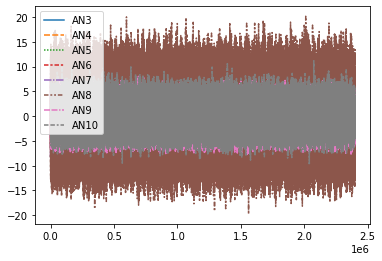

In [ ]:
sns.lineplot(data=Healthy)

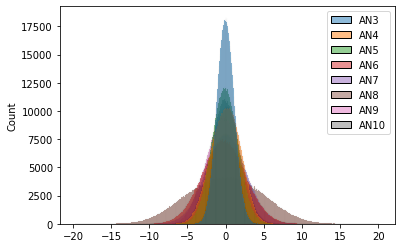

In [ ]:
sns.histplot(data=Healthy)

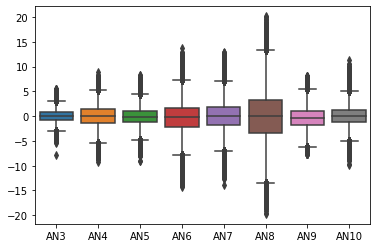

In [ ]:
sns.boxplot(data=Healthy)

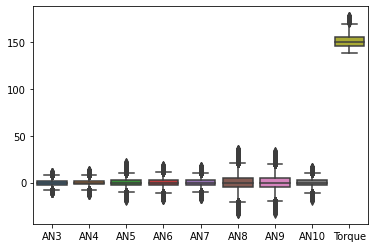

In [ ]:
sns.boxplot(data=Damaged)

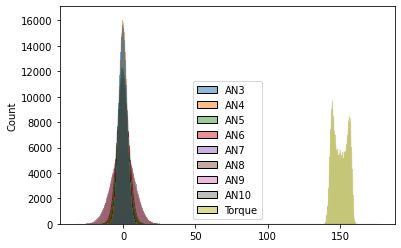

In [ ]:
sns.histplot(data=Damaged)

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


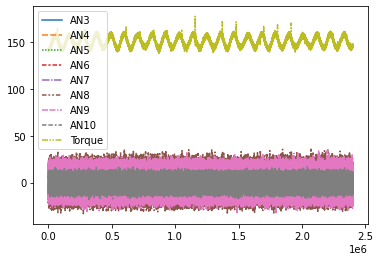

In [ ]:
sns.lineplot(data=Damaged)

In [ ]:
H=Healthy.describe()
H

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10,Speed
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,-3.548204e-03,-2.270035e-03,-9.120902e-02,-2.376961e-01,1.889248e-02,-8.537850e-02,-3.791085e-01,4.922566e-03,9.217280e-02
std,1.133665e+00,1.915300e+00,1.714996e+00,2.805042e+00,2.622841e+00,4.736997e+00,2.129972e+00,1.901185e+00,6.579462e-01
min,-7.840844e+00,-9.193722e+00,-9.034289e+00,-1.421949e+01,-1.383045e+01,-1.972974e+01,-7.741262e+00,-9.871553e+00,-4.316614e-01
25%,-7.751742e-01,-1.324300e+00,-1.250523e+00,-2.130891e+00,-1.739292e+00,-3.434864e+00,-1.844292e+00,-1.280547e+00,6.007124e-04
50%,-1.213865e-02,4.244571e-02,-9.605065e-02,-2.484165e-01,1.489552e-02,-6.017724e-02,-3.487066e-01,-2.316849e-02,6.161537e-04
75%,7.591190e-01,1.348263e+00,1.062067e+00,1.644943e+00,1.772567e+00,3.272652e+00,1.109867e+00,1.261907e+00,6.328709e-04
max,5.500267e+00,8.927255e+00,8.339746e+00,1.383066e+01,1.296540e+01,2.014414e+01,8.095802e+00,1.131551e+01,5.294780e+00


In [ ]:
H.to_csv('h.csv')

In [ ]:
Healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   AN3     float64
 1   AN4     float64
 2   AN5     float64
 3   AN6     float64
 4   AN7     float64
 5   AN8     float64
 6   AN9     float64
 7   AN10    float64
 8   Speed   float64
dtypes: float64(9)
memory usage: 164.8 MB


In [ ]:
Damaged.describe()

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,-2.958428e-02,-1.880567e-02,-1.288336e-01,-3.949460e-02,-5.569755e-02,-3.979978e-02,-8.106140e-02,-1.677803e-02
std,2.874807e+00,2.914573e+00,3.856423e+00,4.024469e+00,3.773341e+00,7.564009e+00,7.154355e+00,3.963131e+00
min,-1.135485e+01,-1.287084e+01,-1.994222e+01,-1.821536e+01,-1.736795e+01,-3.328639e+01,-3.307267e+01,-1.933264e+01
25%,-2.040907e+00,-1.951915e+00,-2.693848e+00,-2.779114e+00,-2.633304e+00,-5.122533e+00,-5.015645e+00,-2.701699e+00
50%,-7.433626e-02,4.150427e-03,-2.290346e-01,-4.444429e-02,-1.086357e-01,7.372648e-02,-1.485469e-01,-2.846304e-02
75%,1.929077e+00,1.937066e+00,2.355113e+00,2.699330e+00,2.467316e+00,5.162461e+00,4.795604e+00,2.685085e+00
max,1.181908e+01,1.322496e+01,2.236811e+01,1.883769e+01,1.788781e+01,3.560002e+01,3.399795e+01,1.707086e+01


In [ ]:
from scipy.stats import skew
print(skew(Healthy, axis=0, bias=True))

[ 0.04891487 -0.0944701   0.01755908  0.01745276  0.00719676 -0.00867739
 -0.04598761  0.08478806  7.07916895]


In [ ]:
from scipy.stats import skew
print(skew(Damaged, axis=0, bias=True))

[ 0.08311239 -0.03702691  0.11187469  0.00222807  0.07200838 -0.06628419
  0.04499418 -0.01838931 -0.30186682]


In [ ]:
from scipy.stats import kurtosis
print(kurtosis(Healthy, axis=0, bias=True))

[-1.99995102e-02 -2.03336095e-01  4.86579550e-03  1.66812625e-02
  8.53313578e-02 -3.11441027e-01 -2.73034455e-01  7.64073108e-02
  4.83348964e+01]


In [ ]:
from scipy.stats import kurtosis
print(kurtosis(Damaged, axis=0, bias=True))

[-0.21215091  0.02492865  0.27635279 -0.07266529 -0.02072116 -0.02664067
 -0.14947894 -0.0898559  -1.26157782]


In [ ]:
Healthy.isnull()

,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2399995,False,False,False,False,False,False,False,False
2399996,False,False,False,False,False,False,False,False
2399997,False,False,False,False,False,False,False,False
2399998,False,False,False,False,False,False,False,False


In [ ]:
Healthy.isnull().sum()

AN3     0
AN4     0
AN5     0
AN6     0
AN7     0
AN8     0
AN9     0
AN10    0
dtype: int64

In [ ]:
Damaged.isnull().sum()

AN3     0
AN4     0
AN5     0
AN6     0
AN7     0
AN8     0
AN9     0
AN10    0
dtype: int64

#RAE


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Load the healthy and damaged datasets into Pandas dataframes
df_healthy = Healthy
df_damaged = Damaged

input_shape = 8
nb_epoch = 100
batchsize = 80
encoding_dim = 6
hidden_dim_1 = 4
hidden_dim_2 = 2
learning_rate = 1e-6

# Set the number of features (columns) in the dataset
num_features = len(df_healthy.columns)

# Separate the healthy and damaged datasets into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_healthy.values, np.zeros(len(df_healthy)), test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
x_test_damaged = df_damaged.values
y_test_damaged = np.ones(len(x_test_damaged))

# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)
# Transform the validation and test data using the fitted scaler
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)
# Transform the damaged test data using the fitted scaler
x_test_damaged_scaled = scaler.transform(x_test_damaged)

# Define the RAE architecture
#input Layer
input_layer = tf.keras.layers.Input(shape=input_shape)
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation='relu')(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_shape, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model on the healthy dataset
autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=nb_epoch,
                batch_size=batchsize,
                shuffle=True,
                validation_data=(x_val_scaled, x_val_scaled),
                verbose=1,
                callbacks=early_stopping)

# Evaluate the autoencoder model on the healthy dataset
test_loss = autoencoder.evaluate(x_test_scaled, x_test_scaled, verbose=0)
print(f"Healthy dataset test loss: {test_loss}")

#
# Evaluate the autoencoder model on the damaged dataset
test_loss_damaged = autoencoder.evaluate(x_test_damaged_scaled, x_test_damaged_scaled, verbose=0)
print(f"Damaged dataset test loss: {test_loss_damaged}")



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_54 (Dense)            (None, 6)                 54        
                                                                 
 dense_55 (Dense)            (None, 4)                 28        
                                                                 
 dense_56 (Dense)            (None, 2)                 10        
                                                                 
 dense_57 (Dense)            (None, 4)                 12        
                                                                 
 dense_58 (Dense)            (None, 6)                 30        
                                                                 
 dense_59 (Dense)            (None, 8)                 56  

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix

# Generate reconstructions for the test data
y_pred = autoencoder.predict(x_test_damaged_scaled)

# Compute the reconstruction error for each sample
mse = np.mean(np.power(x_test_damaged_scaled - y_pred, 2), axis=1)

# Threshold the reconstruction error to predict labels (healthy or damaged)
threshold = np.mean(mse) - np.std(mse)
y_pred1 = (mse > threshold).astype(int)

# Compute the classification accuracy of the predictions
accuracy = accuracy_score(y_test_damaged, y_pred1)
f1_score = f1_score(y_test_damaged, y_pred1)
precision = precision_score(y_test_damaged, y_pred1)
recall = recall_score(y_test_damaged, y_pred1)


print('Accuracy:', accuracy)
print('F1: ',f1_score)
print('Precision :',precision)
print('Recall :', recall)

75000/75000 [==============================] - 111s 1ms/step
Accuracy: 0.89949125
F1:  0.9470864896060984
Precision : 1.0
Recall : 0.89949125


#RF-PCA & LDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load the healthy and damaged datasets into Pandas dataframes
df_healthy = Healthy.sample(n=500000)
df_damaged = Damaged.sample(n=500000)

# Concatenate the datasets and label the samples as healthy (0) or damaged (1)
df = pd.concat([df_healthy, df_damaged], axis=0)
df['label'] = np.concatenate([np.zeros(len(df_healthy)), np.ones(len(df_damaged))])

# Separate the features and labels
X = df.drop(['label'], axis = 1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply LDA to the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [ ]:
# Train and evaluate Random Forest with PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print('Random Forest with PCA:')
print('Accuracy:', accuracy_score(y_test, y_pred_pca))
print('F1:', f1_score(y_test, y_pred_pca))
print('Precision:', precision_score(y_test, y_pred_pca))
print('Recall:', recall_score(y_test, y_pred_pca))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_pca))

Random Forest with PCA:
Accuracy: 0.730525
F1: 0.712880043045352
Precision: 0.762942437511403
Recall: 0.6689830322058132
Confusion Matrix: [[79198 20789]
 [33106 66907]]


In [ ]:
# Train and evaluate Random Forest with LDA
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda = rf_lda.predict(X_test_lda)

print('Random Forest with LDA:')
print('Accuracy:', accuracy_score(y_test, y_pred_lda))
print('F1:', f1_score(y_test, y_pred_lda))
print('Precision:', precision_score(y_test, y_pred_lda))
print('Recall:', recall_score(y_test, y_pred_lda))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_lda))

Random Forest with LDA:
Accuracy: 0.5531
F1: 0.5529122231337161
Precision: 0.5532166201215178
Recall: 0.5526081609390779
Confusion Matrix: [[55352 44635]
 [44745 55268]]
